In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Preprocessing, Metrics
from sklearn import preprocessing
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
df = pd.read_excel('/Users/houhiroshisakai/Desktop/Schulich/MMAI 5000 N - Artificial Intelligent Fundamentals/Group Project Data-SFD Data-Toronto Police.xlsx')
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075


In [3]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

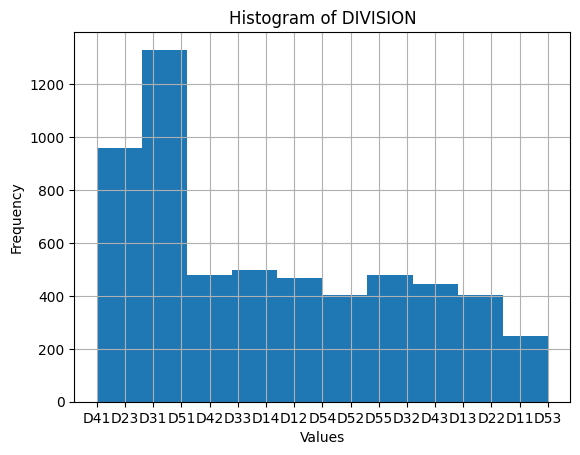

In [4]:
df["DIVISION"].hist()
plt.title("Histogram of DIVISION")
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()

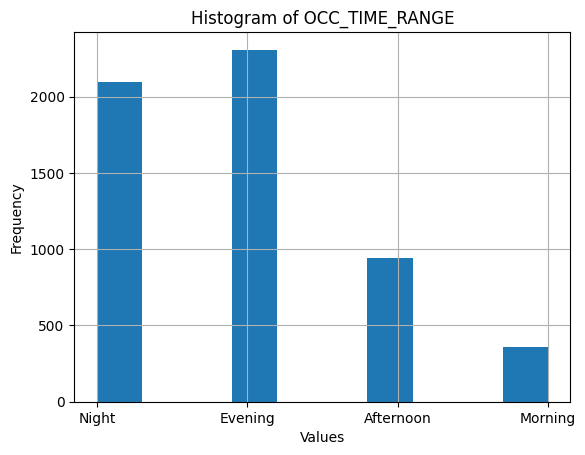

In [5]:
df["OCC_TIME_RANGE"].hist()
plt.title("Histogram of OCC_TIME_RANGE")
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()

In [6]:
#Convert "Year" column to datetime

year_count = df.groupby('OCC_YEAR').size()
print(year_count)

OCC_YEAR
2004    191
2005    262
2006    215
2007    207
2008    238
2009    252
2010    259
2011    227
2012    219
2013    204
2014    177
2015    288
2016    407
2017    392
2018    427
2019    492
2020    462
2021    409
2022    379
dtype: int64


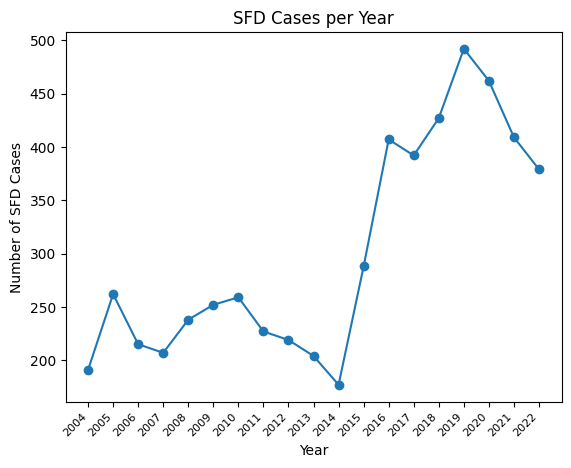

In [7]:
plt.plot(year_count.index, year_count.values, marker ='o') 
plt.xticks(year_count.index)
plt.xticks(rotation=45, ha ='right', fontsize=8) 
plt.xlabel('Year')
plt.ylabel('Number of SFD Cases') 
plt.title('SFD Cases per Year') 
plt.show()

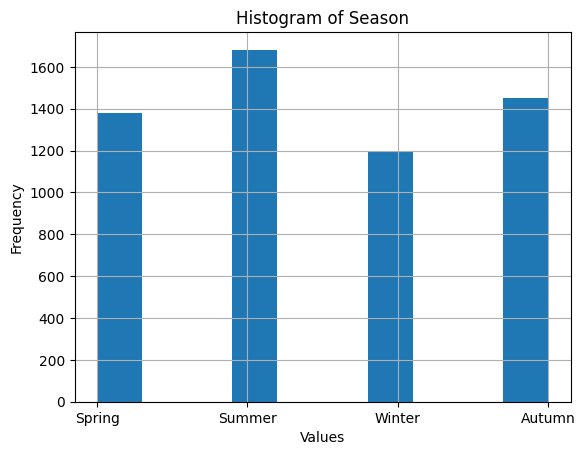

In [8]:
season_period = {
    'January': 'Winter',
    'February': 'Winter', 
    'March': 'Spring', 
    'April': 'Spring', 
    'May': 'Spring', 
    'June': 'Summer', 
    'July': 'Summer', 
    'August': 'Summer', 
    'September': 'Autumn', 
    'October': 'Autumn', 
    'November': 'Autumn', 
    'December': 'Winter'
}


df['Season'] = df['OCC_MONTH'].map(season_period)
df["Season"].hist()
plt.title("Histogram of Season")
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()

Text(0.5, 1.0, 'Seasons Period Distribution')

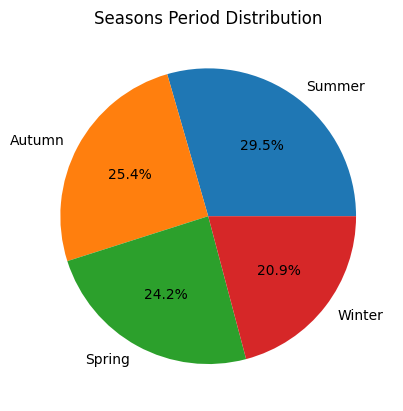

In [9]:
season_count = df['Season'].value_counts()
plt.pie(season_count.values, labels = season_count.index, autopct='%1.1f%%') 
plt.title ('Seasons Period Distribution')

In [10]:
# select the 3 year's Shooting and Firearm Discharge data
df = df[df['OCC_YEAR'].isin([2015, 2016, 2017])]
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,Season
2451,-79.440752,43.697311,2452,GO-20151105533,2015/07/01 04:00:00+00,2015,July,Wednesday,182,1,...,D13,0,0,107,Oakwood Village,107,Oakwood Village (107),-79.440752,43.697311,Summer
2452,-79.482066,43.726636,2453,GO-20152239926,2015/12/31 05:00:00+00,2015,December,Thursday,365,31,...,D31,0,2,155,Downsview,26,Downsview-Roding-CFB (26),-79.482066,43.726636,Winter
2453,-79.564077,43.652450,2454,GO-2015484508,2015/03/23 04:00:00+00,2015,March,Monday,82,23,...,D22,0,0,158,Islington,14,Islington-City Centre West (14),-79.564077,43.652450,Spring
2454,-79.542128,43.750842,2455,GO-20151170722,2015/07/11 04:00:00+00,2015,July,Saturday,192,11,...,D31,0,1,22,Humbermede,22,Humbermede (22),-79.542128,43.750842,Summer
2455,-79.383542,43.693791,2456,GO-2015864657,2015/05/24 04:00:00+00,2015,May,Sunday,144,24,...,D53,0,0,98,Rosedale-Moore Park,98,Rosedale-Moore Park (98),-79.383542,43.693791,Spring


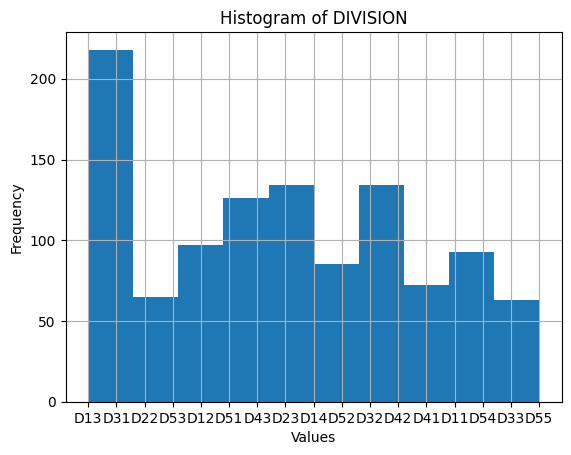

In [11]:
df["DIVISION"].hist()
plt.title("Histogram of DIVISION")
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()

In [12]:
division_count = df['DIVISION'].value_counts()
division_count

DIVISION
D31    183
D23    134
D12     97
D42     85
D41     72
D43     68
D14     61
D51     58
D54     52
D32     49
D22     47
D11     41
D13     35
D33     33
D55     30
D52     24
D53     18
Name: count, dtype: int64

In [13]:
# Random Forest to predict crime hotspots: “An area or neighborhood with a higher number of criminal records in a certain period of time comparing to other locations.”
# to predict the crime hotspots for the future and use two features the “season” and the “NEIGHBOURHOOD_158” for the prediction.

In [13]:
# Convert the time to minutes
df['Hour_Min'] = pd.to_datetime(df['OCC_DATE']).dt.hour + pd.to_datetime(df['OCC_DATE']).dt.minute / 60

# Print Crime Counts per Time and DIVISION
df_filtered = df[df['DIVISION'].isin([
    'D11',
    'D12',
    'D13',
    'D14',
    'D22', 
    'D23',
    'D31',
    'D32',
    'D33',
    'D41',
    'D42',
    'D43',
    'D51',
    'D52',
    'D53',
    'D54',
    'D55'])]


In [14]:
# Processing Function for Features
def cart2polar(x, y):
    dist = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return dist, phi

def preprocessFeatures(dfx):
    
    # Time Feature Engineering
    df = pd.get_dummies(dfx[['OCC_DOW' , 'NEIGHBOURHOOD_158']])
    df['Hour_Min'] = pd.to_datetime(dfx['OCC_DATE']).dt.hour + pd.to_datetime(dfx['OCC_DATE']).dt.minute / 60
    # We add a feature that contains the expontential time
    df['Hour_Min_Exp'] = np.exp(df['Hour_Min'])
    
    df['Day'] = pd.to_datetime(dfx['OCC_DATE']).dt.day
    df['Month'] = pd.to_datetime(dfx['OCC_DATE']).dt.month
    df['Year'] = pd.to_datetime(dfx['OCC_DATE']).dt.year

    month_one_hot_encoded = pd.get_dummies(pd.to_datetime(dfx['OCC_DATE']).dt.month, prefix='Month')
    df = pd.concat([df, month_one_hot_encoded], axis=1, join="inner")
    
    # Convert Coordinates to Polar Coordinates
    df[['X', 'Y']] = dfx[['X', 'Y']] # we maintain the original coordindates as additional features
    df['dist'], df['phi'] = cart2polar(dfx['X'], dfx['Y'])
  

    return df

In [15]:
# Processing Function for Labels
def encodeLabels(dfx):
    df = pd.DataFrame (columns = [])
    factor = pd.factorize(dfx['DIVISION'])
    return factor


# Encode Labels as Integer
factor = encodeLabels(df)
y_df = factor[0]
labels = list(factor[1])
# for val, i in enumerate(labels):
#     print(val, i)

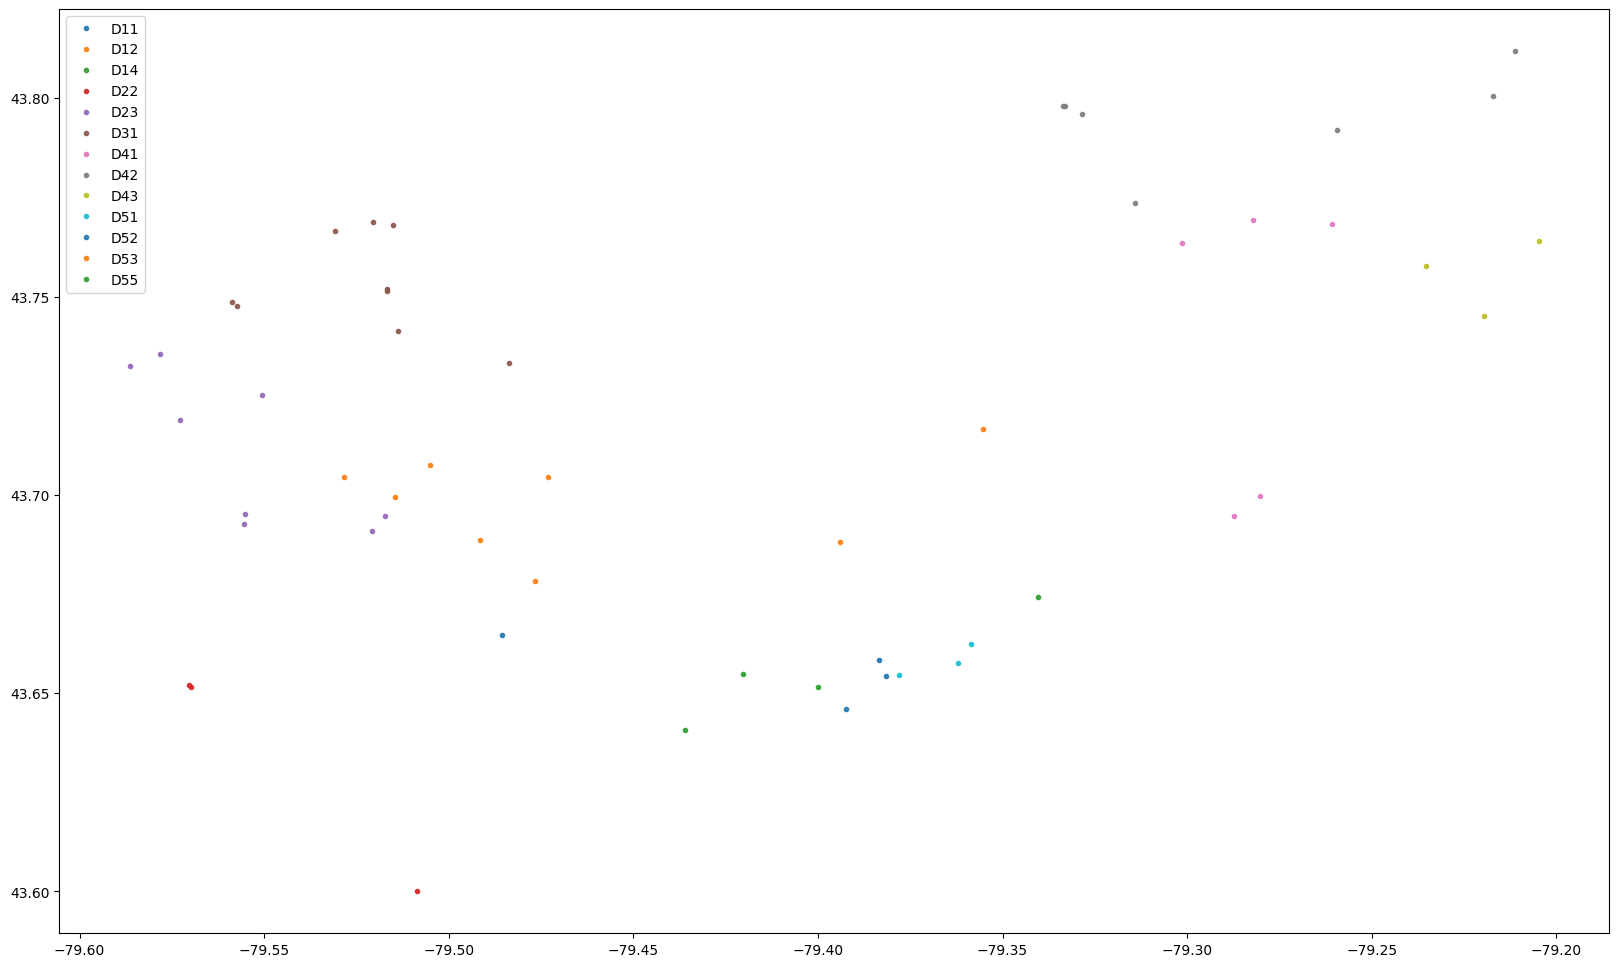

In [16]:
# Plot SFD by Lat and Long
df_filtered = df.sample(frac=0.05)  
#df_filtered = df_cleaned[df_cleaned['Category'].isin(['PROSTITUTION', 'VEHICLE THEFT', 'FRAUD'])].sample(frac=0.05) # to filter 

groups = df_filtered.groupby('DIVISION')

fig, ax = plt.subplots(sharex=False, figsize=(20, 12))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['X'], group['Y'], marker='.', linestyle='', label=name, alpha=0.9)
ax.legend()
plt.show()

In [17]:
# Create train_df & test_df
x_df = preprocessFeatures(df).copy()

# Split the data into x_train and y_train data sets
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.7, random_state=0)
x_train

,OCC_DOW_Friday,OCC_DOW_Monday,OCC_DOW_Saturday,OCC_DOW_Sunday,OCC_DOW_Thursday,OCC_DOW_Tuesday,OCC_DOW_Wednesday,NEIGHBOURHOOD_158_Agincourt North,NEIGHBOURHOOD_158_Agincourt South-Malvern West,NEIGHBOURHOOD_158_Annex,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,X,Y,dist,phi
3269,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,-79.538412,43.590860,90.700177,2.640249
2713,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,-79.501498,43.741494,90.740325,2.638598
2457,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,-79.536027,43.733419,90.766687,2.638859
2717,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,-79.315242,43.757863,90.585088,2.637449
3488,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,-79.514576,43.699525,90.731562,2.639073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,-79.517071,43.754848,90.760406,2.638552
3214,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,-79.335991,43.679723,90.565544,2.638315
3286,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,-79.369005,43.654614,90.582362,2.638733
3010,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,-79.610777,43.733979,90.832465,2.639251


In [18]:
# Train a single random forest classifier - parameters are a best guess
rf = RandomForestClassifier(max_depth=100, random_state=0, n_estimators = 200)
rf.fit(x_train, y_train.ravel())
y_pred = rf.predict(x_test)

results_log = classification_report(y_test, y_pred)
print(results_log)

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.98      0.98      0.98        55
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00         4
           4       0.93      1.00      0.97        28
           5       1.00      1.00      1.00        21
           6       0.90      1.00      0.95        19
           7       0.96      0.98      0.97        49
           8       0.92      0.92      0.92        12
           9       1.00      0.88      0.93         8
          10       0.88      0.93      0.90        15
          11       1.00      1.00      1.00        32
          12       1.00      0.86      0.92        21
          13       0.91      1.00      0.95        10
          14       0.83      1.00      0.91        10
          15       1.00      1.00      1.00         8
          16       1.00      0.75      0.86         8

    accuracy              

In [19]:
# Evaluate the model on the test set
accuracy = rf.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9571865443425076


In [20]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': x_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Display the ranking of divisions based on shooting and firearm discharge activities
print("Ranking of Divisions based on Shooting and Firearm Discharge Activities:")
print(importance_df['Feature'])

Ranking of Divisions based on Shooting and Firearm Discharge Activities:
164                                           dist
165                                            phi
162                                              X
163                                              Y
147                                            Day
                          ...                     
14          NEIGHBOURHOOD_158_Bedford Park-Nortown
113    NEIGHBOURHOOD_158_South Eglinton-Davisville
65            NEIGHBOURHOOD_158_Humewood-Cedarvale
36            NEIGHBOURHOOD_158_Dovercourt Village
83                      NEIGHBOURHOOD_158_Milliken
Name: Feature, Length: 166, dtype: object


<Axes: xlabel='Predicted', ylabel='Actual'>

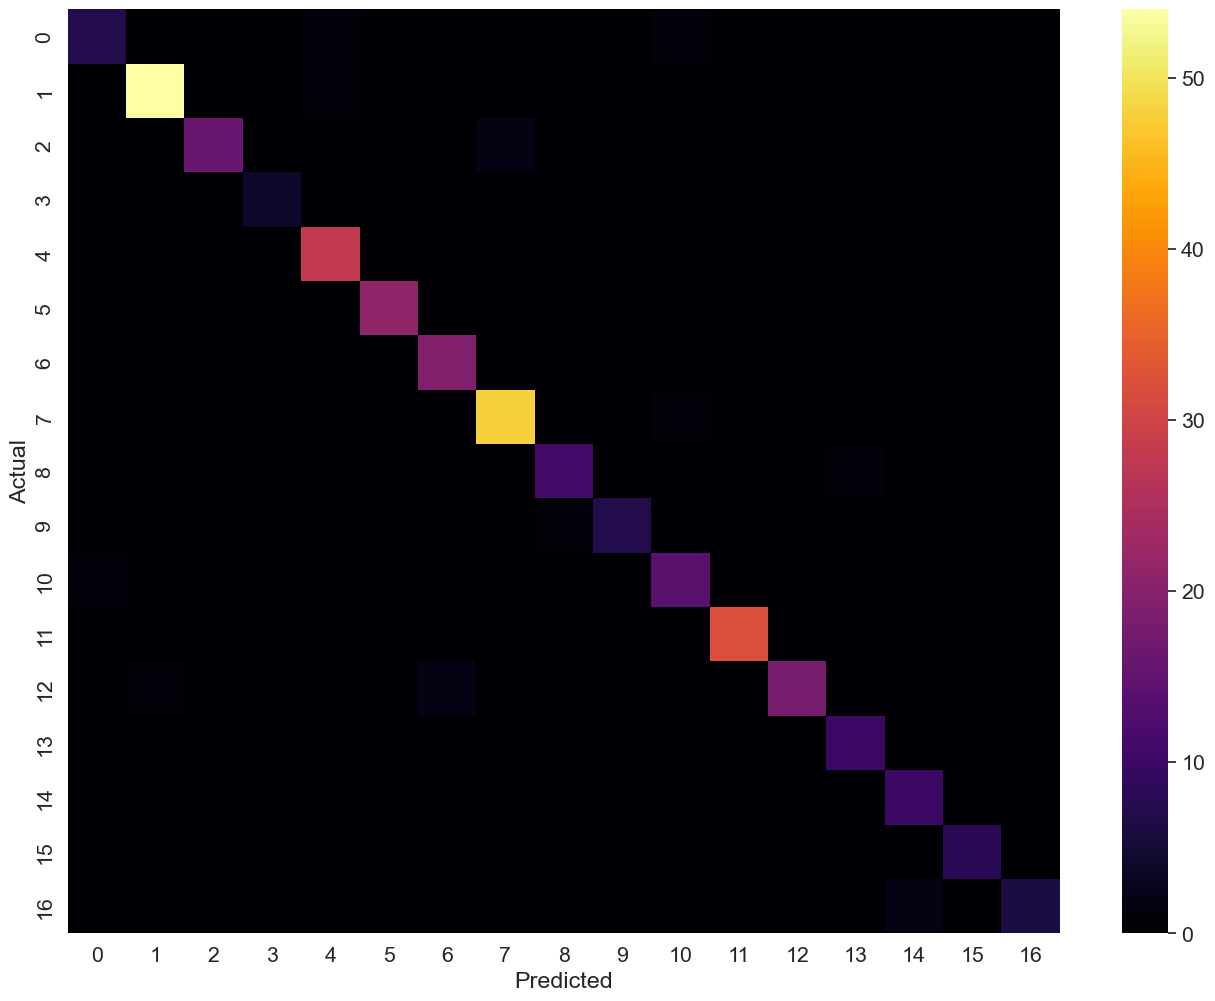

In [21]:
# Print a multi-Class Confusion Matrix
cnf_matrix = confusion_matrix(y_test.reshape(-1), y_pred)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=False, fmt='.0f' #, annot_kws={"size": 13}
           )

In [22]:
# load the police data by division
df_p = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/MMAI 5000 N - Artificial Intelligent Fundamentals/Personnel_by_Rank_by_Division_(ASR-PB-TBL-003).csv')
df_p.head()

,Index_,Year,Command_Group,Command_Subunit,Unit,Classification,Count_,ObjectId
0,1,2014,Area Field Command,Area Field Command,22 Division,Civilian,12,1
1,2,2014,Area Field Command,Area Field Command,22 Division,Detective Sergeant/ Staff Sergeant,7,2
2,3,2014,Area Field Command,Area Field Command,22 Division,Inspector,1,3
3,4,2014,Area Field Command,Area Field Command,22 Division,Police Constable,165,4
4,5,2014,Area Field Command,Area Field Command,22 Division,Sergeant/Detective,32,5


In [23]:
# replace the unit value to be the same as the DIVISION data value in df
replace_dict = {'11 Division': 'D11',
                '12 Division': 'D12',
                '13 Division': 'D13',
                '14 Division': 'D14',
                '22 Division': 'D22', 
                '23 Division': 'D23',
                '31 Division': 'D31',
                '32 Division': 'D32',
                '33 Division': 'D33',
                '41 Division': 'D41',
                '42 Division': 'D42',
                '43 Division': 'D43',
                '51 Division': 'D51',
                '52 Division': 'D52',
                '53 Division': 'D53',
                '54 Division': 'D54',
                '55 Division': 'D55'}
df_p['Unit'] = df_p['Unit'].replace(replace_dict)
df_p.info()
df_p.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index_           1128 non-null   int64 
 1   Year             1128 non-null   int64 
 2   Command_Group    1128 non-null   object
 3   Command_Subunit  1128 non-null   object
 4   Unit             1128 non-null   object
 5   Classification   1128 non-null   object
 6   Count_           1128 non-null   int64 
 7   ObjectId         1128 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 70.6+ KB


,Index_,Year,Command_Group,Command_Subunit,Unit,Classification,Count_,ObjectId
0,1,2014,Area Field Command,Area Field Command,D22,Civilian,12,1
1,2,2014,Area Field Command,Area Field Command,D22,Detective Sergeant/ Staff Sergeant,7,2
2,3,2014,Area Field Command,Area Field Command,D22,Inspector,1,3
3,4,2014,Area Field Command,Area Field Command,D22,Police Constable,165,4
4,5,2014,Area Field Command,Area Field Command,D22,Sergeant/Detective,32,5


In [24]:
new_df_p = df_p.groupby(["Year","Unit"])["Count_"].sum().reset_index()
print(new_df_p)

     Year                       Unit  Count_
0    2014         Area Field Command      12
1    2014                        COS     111
2    2014      Central Field Command      10
3    2014                        D11     213
4    2014                        D12     209
..    ...                        ...     ...
183  2021   Parking Enforcement Unit     393
184  2021     Public Safety Response      71
185  2021  Toronto Police Operations      33
186  2021           Traffic Services     307
187  2021         West Field Command       3

[188 rows x 3 columns]


In [25]:
new_df_p_filtered = new_df_p[new_df_p['Unit'].isin([
    'D11',
    'D12',
    'D13',
    'D14',
    'D22', 
    'D23',
    'D31',
    'D32',
    'D33',
    'D41',
    'D42',
    'D43',
    'D51',
    'D52',
    'D53',
    'D54',
    'D55'])]
print(new_df_p_filtered)

     Year Unit  Count_
3    2014  D11     213
4    2014  D12     209
5    2014  D13     175
6    2014  D14     266
7    2014  D22     218
..    ...  ...     ...
176  2021  D43     249
177  2021  D51     294
178  2021  D52     246
179  2021  D53     178
180  2021  D55     307

[128 rows x 3 columns]


In [26]:
# rename variablesin in the SDF data

df_filtered = df_filtered.rename(columns={'OCC_YEAR': 'Year', 'DIVISION': 'Unit'})

# merge two datasets together based on year and unit variable---add a varaible of count of policemen
merged_df = pd.merge(df_filtered, new_df_p_filtered, on=["Year", "Unit"], how="left")
print(merged_df)
merged_df.info()

            X          Y  OBJECTID EVENT_UNIQUE_ID                OCC_DATE   
0  -79.211206  43.811851      3146  GO-20161216683  2016/07/10 04:00:00+00  \
1  -79.362023  43.657597      3072   GO-2016766584  2016/05/04 04:00:00+00   
2  -79.280363  43.699654      3372  GO-20172005569  2017/11/05 04:00:00+00   
3  -79.381631  43.654421      2558  GO-20151441307  2015/08/09 04:00:00+00   
4  -79.333630  43.798045      2520   GO-2015762095  2015/05/07 04:00:00+00   
5  -79.394138  43.688077      2945   GO-2016927444  2016/05/29 04:00:00+00   
6  -79.572917  43.718753      3117   GO-2016896346  2016/05/24 04:00:00+00   
7  -79.578306  43.735498      2961  GO-20161294551  2016/07/23 04:00:00+00   
8  -79.555532  43.692565      2633  GO-20151666470  2015/09/26 04:00:00+00   
9  -79.520401  43.768821      3332   GO-2017481626  2017/03/18 04:00:00+00   
10 -79.358684  43.662409      2655  GO-20151396370  2015/08/14 04:00:00+00   
11 -79.485489  43.664524      2620  GO-20151847444  2015/10/27 0

In [27]:
# Processing Function for Features
def cart2polar(x, y):
    dist = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return dist, phi


def preprocessFeatures(dfx):
    
    # Time Feature Engineering
    merged_df = pd.get_dummies(dfx[['OCC_DOW' , 'NEIGHBOURHOOD_158','Count_']])
    merged_df['Hour_Min'] = pd.to_datetime(dfx['OCC_DATE']).dt.hour + pd.to_datetime(dfx['OCC_DATE']).dt.minute / 60
    # We add a feature that contains the expontential time
    merged_df['Hour_Min_Exp'] = np.exp(df['Hour_Min'])
    
    merged_df['Day'] = pd.to_datetime(dfx['OCC_DATE']).dt.day
    merged_df['Month'] = pd.to_datetime(dfx['OCC_DATE']).dt.month
    merged_df['Year'] = pd.to_datetime(dfx['OCC_DATE']).dt.year

    month_one_hot_encoded = pd.get_dummies(pd.to_datetime(dfx['OCC_DATE']).dt.month, prefix='Month')
    
    Count_var = pd.factorize(merged_df['Count_'])
    merged_df['Count_'] = Count_var[0]
    definition_list = Count_var[1] 
    
    
    merged_df = pd.concat([merged_df, month_one_hot_encoded], axis=1, join="inner")
    
    # Convert Coordinates to Polar Coordinates
    merged_df[['X', 'Y']] = dfx[['X', 'Y']] # we maintain the original coordindates as additional features
    
    merged_df['dist'], merged_df['phi'] = cart2polar(dfx['X'], dfx['Y'])
  
    return merged_df

In [28]:
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df = merged_df.dropna()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  54 non-null     float64
 1   Y                  54 non-null     float64
 2   OBJECTID           54 non-null     int64  
 3   EVENT_UNIQUE_ID    54 non-null     object 
 4   OCC_DATE           54 non-null     object 
 5   Year               54 non-null     int64  
 6   OCC_MONTH          54 non-null     object 
 7   OCC_DOW            54 non-null     object 
 8   OCC_DOY            54 non-null     int64  
 9   OCC_DAY            54 non-null     int64  
 10  OCC_HOUR           54 non-null     int64  
 11  OCC_TIME_RANGE     54 non-null     object 
 12  Unit               54 non-null     object 
 13  DEATH              54 non-null     int64  
 14  INJURIES           54 non-null     int64  
 15  HOOD_158           54 non-null     int64  
 16  NEIGHBOURHOOD_158  54 non-nu

In [29]:
# Processing Function for Labels
def encodeLabels(dfx):
    merged_df = pd.DataFrame (columns = [])
    factor = pd.factorize(dfx['Unit'])
    return factor


# Encode Labels as Integer
factor = encodeLabels(merged_df)
y_df = factor[0]
labels = list(factor[1])
# for val, i in enumerate(labels):
#     print(val, i)

In [30]:
# Create train_df & test_df
x_df = preprocessFeatures(merged_df).copy()


#print(x_df)
# Split the data into x_train and y_train data sets
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.7, random_state=0)
x_train

,Count_,OCC_DOW_Friday,OCC_DOW_Monday,OCC_DOW_Saturday,OCC_DOW_Sunday,OCC_DOW_Thursday,OCC_DOW_Tuesday,OCC_DOW_Wednesday,NEIGHBOURHOOD_158_Agincourt South-Malvern West,NEIGHBOURHOOD_158_Bendale-Glen Andrew,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,X,Y,dist,phi
7,6,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,-79.578306,43.735498,90.804739,2.639064
14,12,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,-79.435970,43.640714,90.634349,2.639224
27,18,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,-79.392325,43.646048,90.598669,2.638940
35,15,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,-79.550561,43.725091,90.775412,2.639017
49,7,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,-79.516800,43.751468,90.758540,2.638583
18,15,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,-79.586413,43.732501,90.810401,2.639136
51,22,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,-79.399912,43.651431,90.607911,2.638929
34,21,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,-79.328619,43.795989,90.615222,2.637152
15,13,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,-79.514576,43.699525,90.731562,2.639073
5,5,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,-79.394138,43.688077,90.620512,2.638543


In [31]:
x_test[x_test==np.inf]=np.nan
x_test.fillna(0, inplace=True)

x_train[x_train==np.inf]=np.nan
x_train.fillna(0, inplace=True)

In [32]:
# Train a single random forest classifier - parameters are a best guess
rf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators = 3)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

results_log = classification_report(y_test, y_pred)
print(results_log)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.20      1.00      0.33         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1

    accuracy                           0.24        17
   macro avg       0.07      0.17      0.09        17
weighted avg       0.10      0.24      0.13        17



/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

In [33]:
# Evaluate the model on the test set
accuracy = rf.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.23529411764705882


In [34]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': x_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Display the ranking of divisions based on shooting and firearm discharge activities
print("Ranking of Divisions based on Shooting and Firearm Discharge Activities:")
print(importance_df['Feature'])

Ranking of Divisions based on Shooting and Firearm Discharge Activities:
26                    NEIGHBOURHOOD_158_Malvern East
10                     NEIGHBOURHOOD_158_Black Creek
59                                           Month_8
0                                             Count_
61                                          Month_10
                           ...                      
32               NEIGHBOURHOOD_158_Rockcliffe-Smythe
33    NEIGHBOURHOOD_158_Runnymede-Bloor West Village
1                                     OCC_DOW_Friday
35             NEIGHBOURHOOD_158_Scarborough Village
34                          NEIGHBOURHOOD_158_Rustic
Name: Feature, Length: 68, dtype: object
